### Histograma

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy import stats as scipy
%matplotlib inline

In [71]:
#Distâncias em km entre casa e trabalho 
km = pd.Series([4,6,6,7,11,13,18,19,21,24,26,27,35,36,36,36,42,43,45,49])

In [72]:
#Criar lista com ticks do eixo x
def lista_ticks(barras, serie):
    intervalo_ticks = ((serie.max() - serie.min()) / barras) #Intervalo ideal
    ticks = []
    x = serie.min()
    while x <= serie.max():
        ticks.append(x)
        x += intervalo_ticks
    return ticks

#Criar lista com frequencia_relativa
def lista_freq_rel(serie, yticks):
    lista_freq = []
    for x in yticks:
        valor = x / len(serie)
        lista_freq.append(pct(x))
    return lista_freq

#Criar histograna
def gera_hist(barras, data, titulo, unidade):
    ticks = lista_ticks(barras, data)
    ax = data.plot.hist(bins=barras, rwidth=0.95)
    yticks = ax.get_yticks()
    #freq_rel = lista_freq_rel(data, yticks)
    #ax.set_yticklabels(freq_rel)
    
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    fig.set_dpi(150)
    
    plt.xticks(ticks)
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.30)
    plt.show()
    return

#Transformar decimal em porcentagem
def pct(x):
    valor = "{0:.2f}%".format(x*100)
    return valor

In [73]:
#Média, mediana e moda
print("Média Aritmética: ", stats.mean(km))
print("Médiana: ", stats.median(km))
print("Moda: ", stats.mode(km))

Média Aritmética:  25.2
Médiana:  25.0
Moda:  36


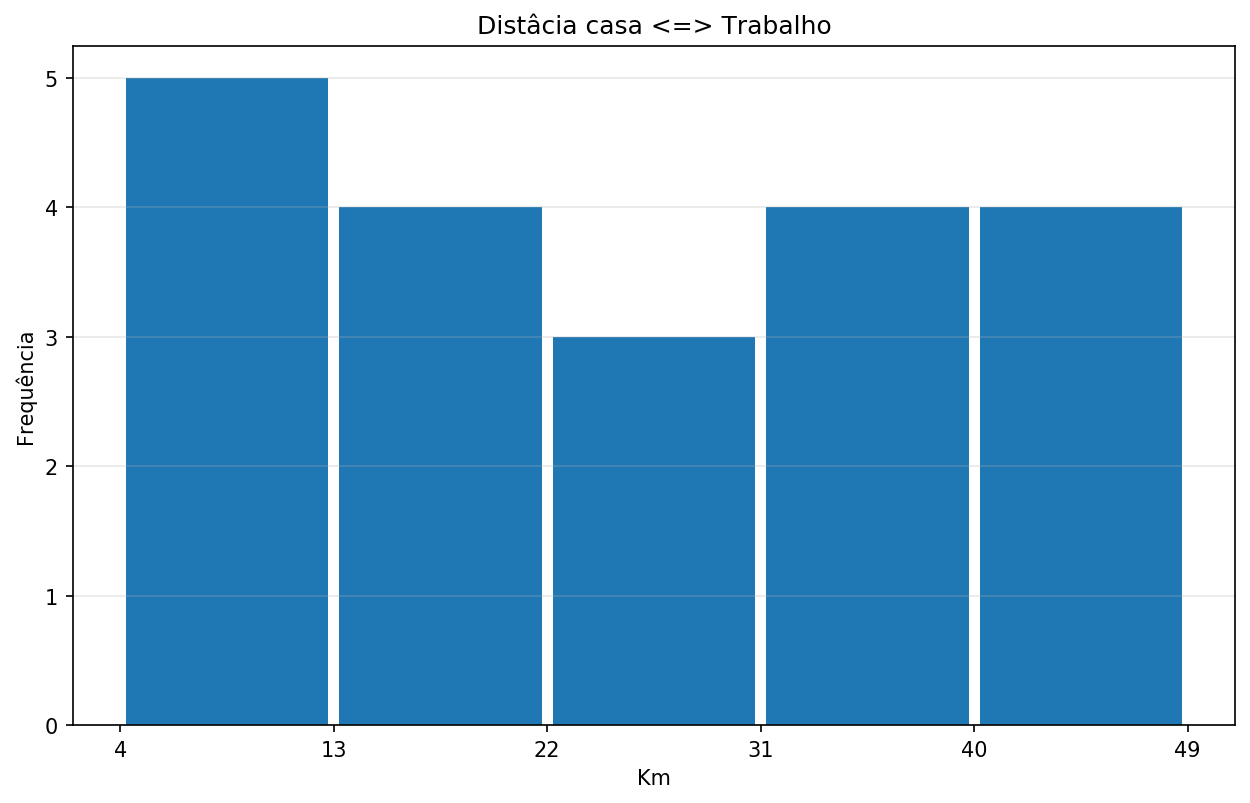

In [74]:
gera_hist(5, km, 'Distâcia casa <=> Trabalho', 'Km')

In [75]:
data = pd.read_csv('DataSets/weight-height.csv')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [92]:
data.head()

,Sexo,Altura,Peso,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.72
1,Male,68.781904,162.310473,175.0,73.62
2,Male,74.110105,212.740856,188.0,96.50
3,Male,71.730978,220.042470,182.0,99.81
4,Male,69.881796,206.349801,177.0,93.60


In [78]:
data.columns = ['Sexo', 'Altura', 'Peso']

In [79]:
#Converter de pol para cm
data['Altura_cm'] = data['Altura']*2.54

In [80]:
#Converter de libra para kg
data['Peso_kg'] = data['Peso']*0.453592

In [91]:
data['Altura_cm'] = data['Altura_cm'].round(0)
data['Peso_kg'] = data['Peso_kg'].round(2)

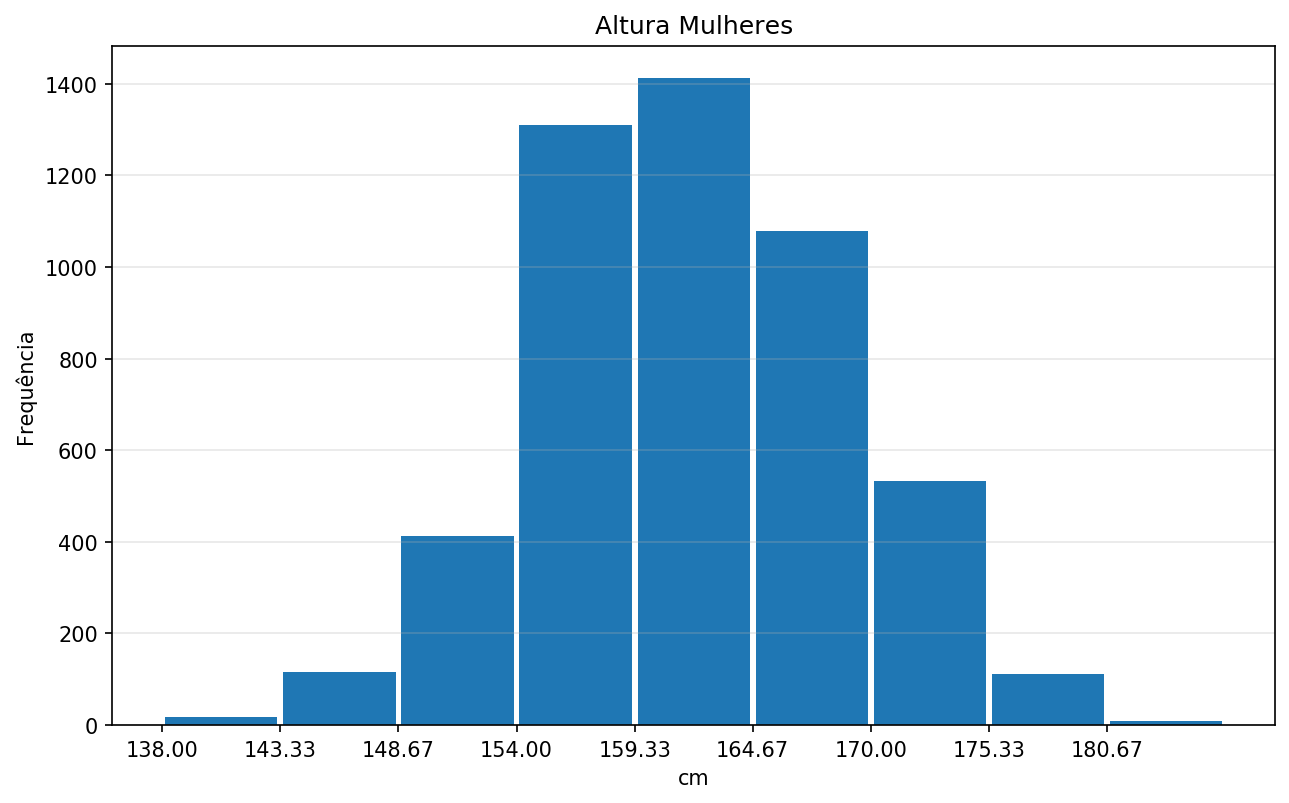

In [82]:
gera_hist(9, data.loc[data['Sexo']=='Female']['Altura_cm'],
          'Altura Mulheres', 'cm')

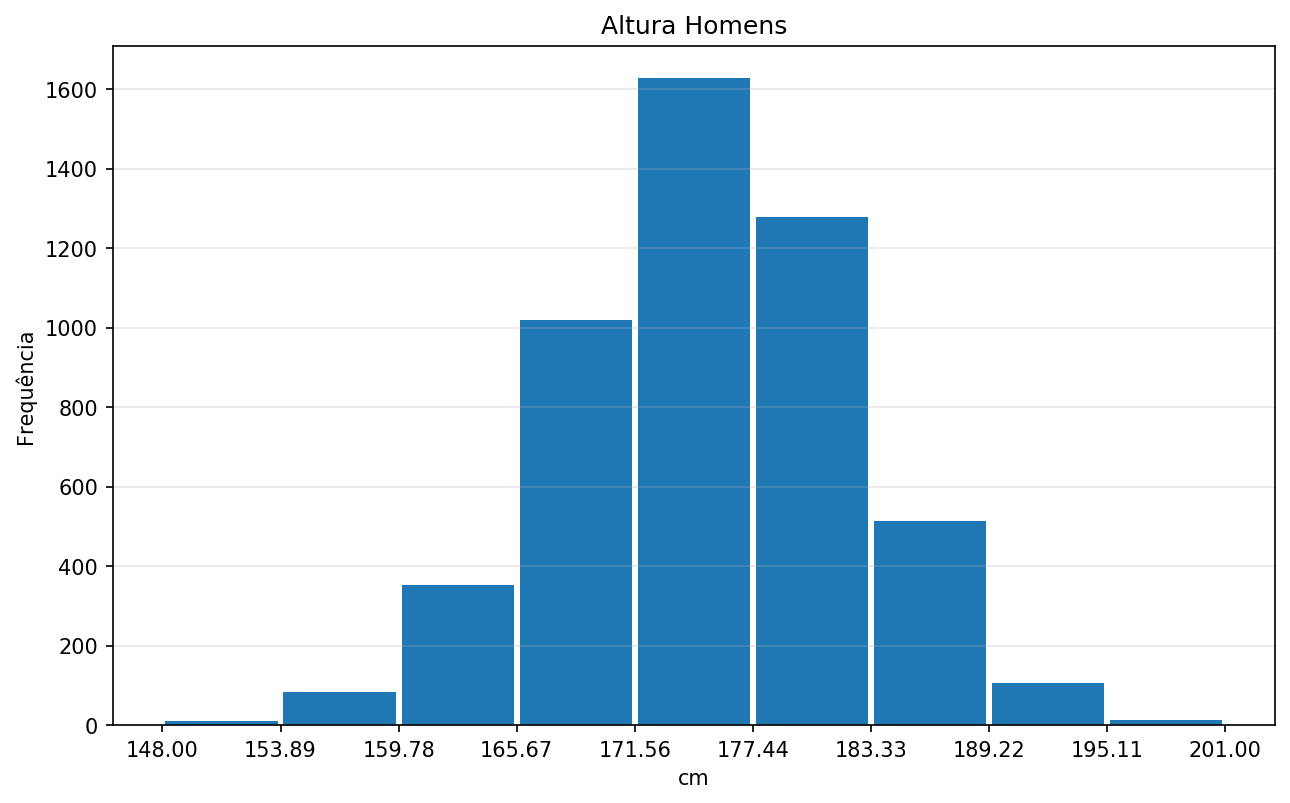

In [83]:
gera_hist(9, data.loc[data['Sexo']=='Male']['Altura_cm'],
          'Altura Homens', 'cm')

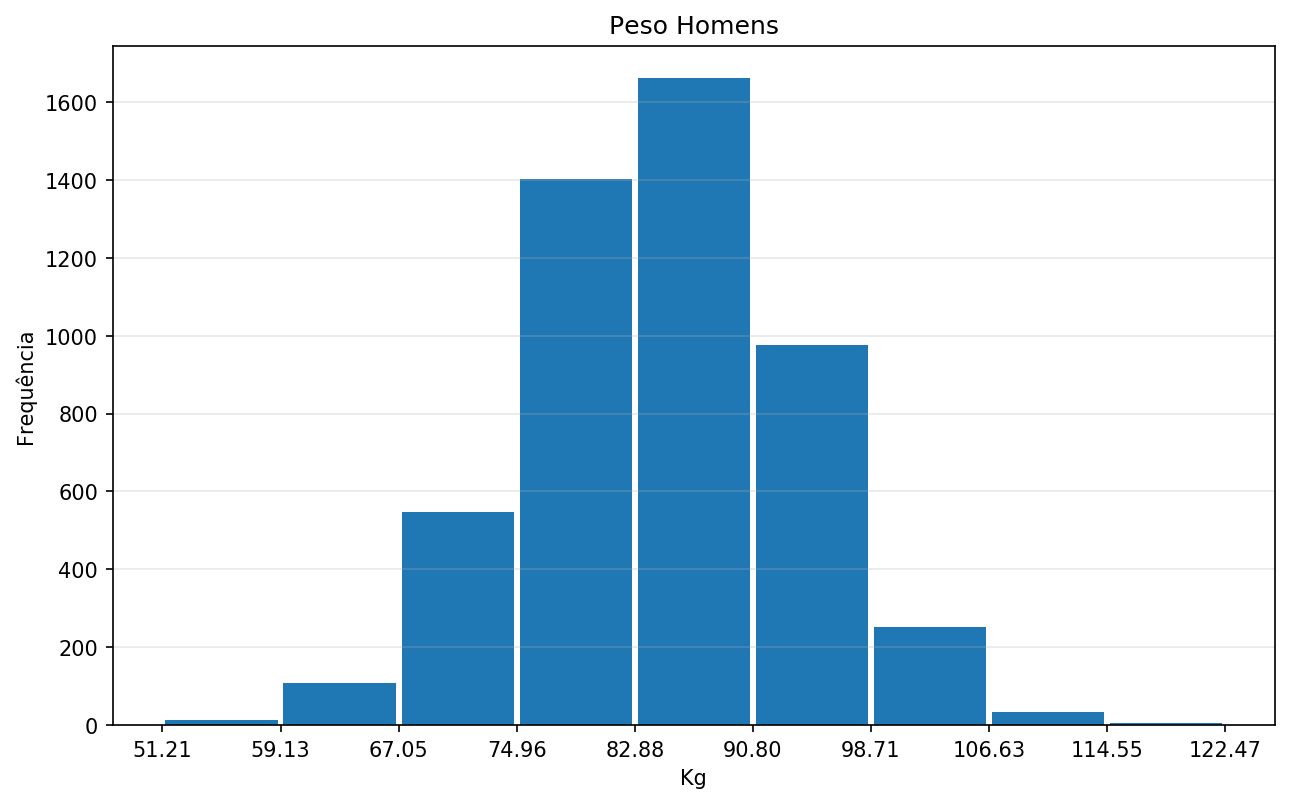

In [84]:
gera_hist(9, data.loc[data['Sexo']=='Male']['Peso_kg'],
         'Peso Homens', 'Kg')

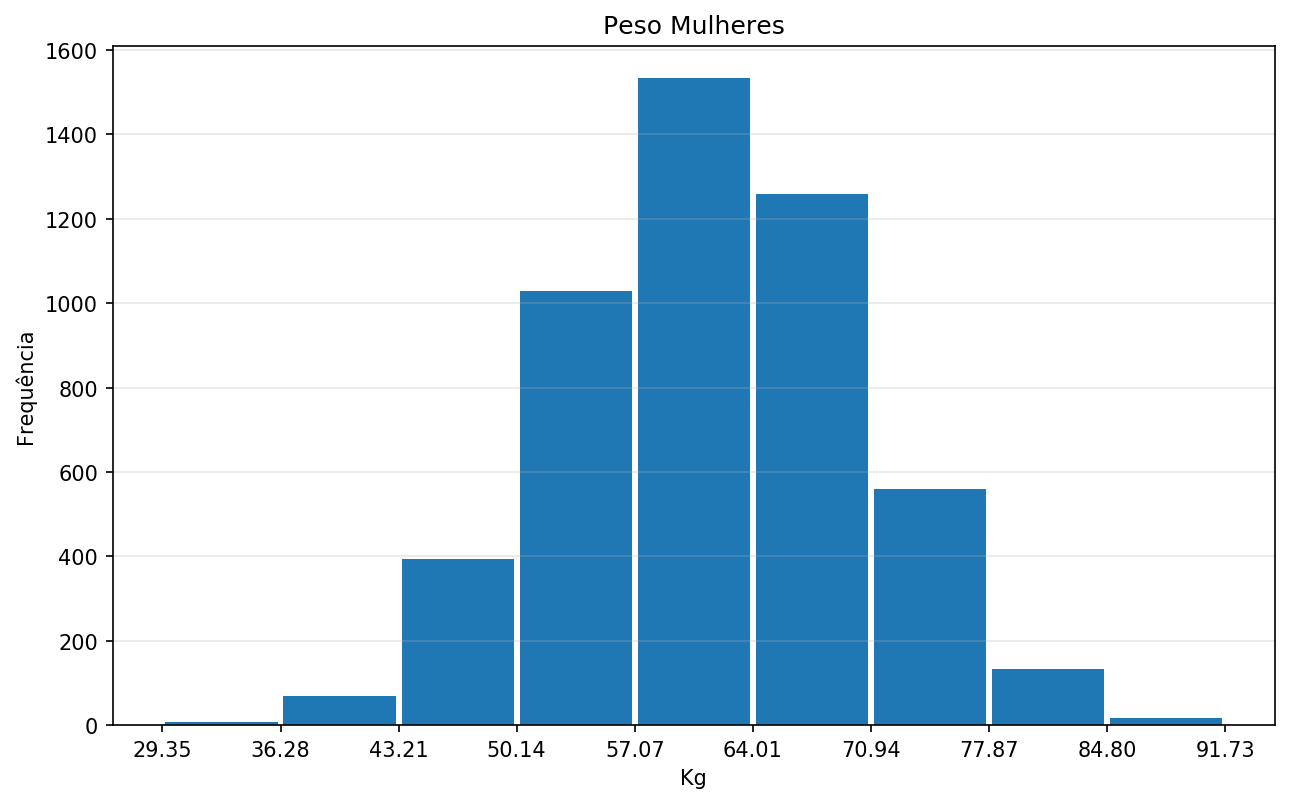

In [85]:
gera_hist(9, data.loc[data['Sexo']=='Female']['Peso_kg'],
         'Peso Mulheres', 'Kg')

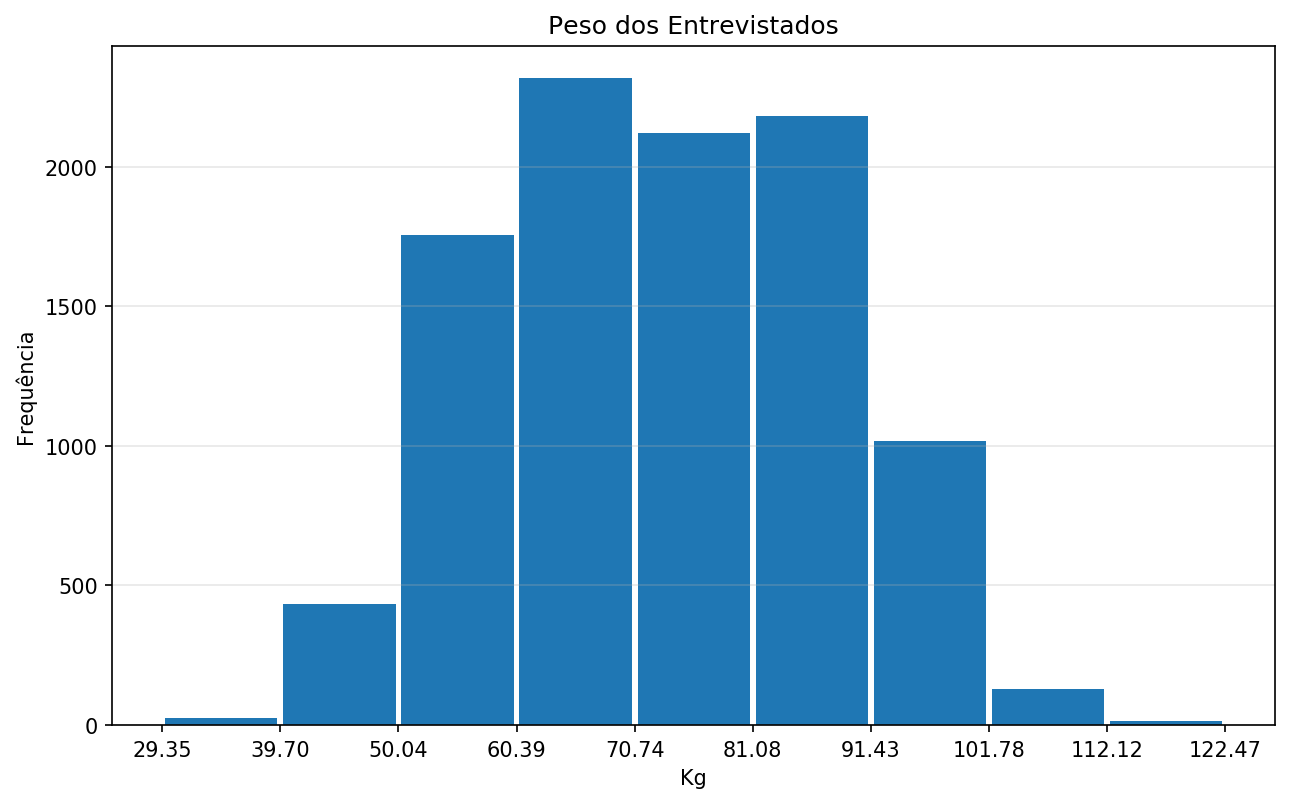

In [94]:
gera_hist(9,data['Peso_kg'],'Peso dos Entrevistados', 'Kg')

In [86]:
#Média, mediana e moda
print("Média Aritmética: ", data.loc[data['Sexo']=='Female']['Altura_cm'].mean())
print("Médiana: ", data.loc[data['Sexo']=='Female']['Altura_cm'].median())
print("Moda: ", data.loc[data['Sexo']=='Female']['Altura_cm'].mode())
print("Variança Populacional: ",
      stats.pvariance(data.loc[data['Sexo']=='Female']['Altura_cm']))
print("Desvio Padrão: ",
      stats.stdev(data.loc[data['Sexo']=='Female']['Altura_cm']))

Média Aritmética:  161.8112
Médiana:  162.0
Moda:  0    162.0
dtype: float64
Variança Populacional:  46.91595456
Desvio Padrão:  6.850207268975559


In [87]:
#Média, mediana e moda
print("Média Aritmética: ", data.loc[data['Sexo']=='Male']['Altura_cm'].mean())
print("Médiana: ", data.loc[data['Sexo']=='Male']['Altura_cm'].median())
print("Moda: ", data.loc[data['Sexo']=='Male']['Altura_cm'].mode())
print("Variança Populacional: ",
      stats.pvariance(data.loc[data['Sexo']=='Male']['Altura_cm']))
print("Desvio Padrão: ",
      stats.stdev(data.loc[data['Sexo']=='Male']['Altura_cm']))

Média Aritmética:  175.327
Médiana:  175.0
Moda:  0    175.0
dtype: float64
Variança Populacional:  53.086071
Desvio Padrão:  7.286747582980188


In [88]:
#Coeficiente de variação
altura_mulheres = data.loc[data['Sexo']=='Female']['Altura_cm']
altura_homens = data.loc[data['Sexo']=='Male']['Altura_cm']
peso_mulheres = data.loc[data['Sexo']=='Female']['Peso_kg']
peso_homens = data.loc[data['Sexo']=='Male']['Peso_kg']
coefvar_alt_mulheres = stats.stdev(altura_mulheres) / stats.mean(altura_mulheres)
coefvar_alt_homens = stats.stdev(altura_homens) / stats.mean(altura_homens)
coefvar_peso_mulheres = stats.stdev(peso_mulheres) / stats.mean(peso_mulheres)
coefvar_peso_homens = stats.stdev(peso_homens) / stats.mean(peso_homens)

print('Coeficiente de variação altura mulheres: ', pct(coefvar_alt_mulheres))
print('Coeficiente de variação altura homens: ', pct(coefvar_alt_homens))
print('Coeficiente de variação peso mulheres: ', pct(coefvar_peso_mulheres))
print('Coeficiente de variação peso homens: ', pct(coefvar_peso_homens))

Coeficiente de variação altura mulheres:  4.23%
Coeficiente de variação altura homens:  4.16%
Coeficiente de variação peso mulheres:  14.00%
Coeficiente de variação peso homens:  10.58%


In [95]:
coefvar_dict = {'homens': {'cv peso': pct(coefvar_peso_homens),
                          'cv altura': pct(coefvar_alt_homens)},
               'mulheres': {'cv peso': pct(coefvar_peso_mulheres),
                           'cv altura': pct(coefvar_alt_mulheres)}}

In [96]:
cv_data = pd.DataFrame.from_dict(coefvar_dict)

In [97]:
cv_data

,homens,mulheres
cv peso,10.58%,14.00%
cv altura,4.16%,4.23%


In [111]:
#Coeficiente de variação usando scipy
round(scipy.stats.variation(data.loc[data['Sexo']=='Male']['Altura_cm'])*100, 2)

4.16

In [112]:
data.head()

,Sexo,Altura,Peso,Altura_cm,Peso_kg
0,Male,73.847017,241.893563,188.0,109.72
1,Male,68.781904,162.310473,175.0,73.62
2,Male,74.110105,212.740856,188.0,96.50
3,Male,71.730978,220.042470,182.0,99.81
4,Male,69.881796,206.349801,177.0,93.60


In [122]:
data_tmp = data[['Altura_cm', 'Peso_kg']]

In [123]:
data_tmp.head()

,Altura_cm,Peso_kg
0,188.0,109.72
1,175.0,73.62
2,188.0,96.50
3,182.0,99.81
4,177.0,93.60


In [148]:
#Calcular coeficiente de correlação na mão
resultado = 0
for x in range(0,len(data_tmp)):
    calculo = (data_tmp['Altura_cm'][x] - data_tmp['Altura_cm'].mean()) *\
               (data_tmp['Peso_kg'][x] - data_tmp['Peso_kg'].mean())
    resultado += calculo
resultado = (resultado / (len(data_tmp)-1)) / (stats.stdev(data_tmp['Altura_cm']) * stats.stdev(data_tmp['Peso_kg']))
print('Coeficiente de correlação entre Peso e Altura: ', round(resultado, 2))

Coeficiente de correlação entre Peso e Altura:  0.92


In [146]:
#Calcular coeficiente de correlação usando SciPy
scipy.stats.pearsonr(data_tmp['Altura_cm'], data_tmp['Peso_kg'])

(0.9244652817157697, 0.0)

In [149]:
data_tmp.corr()

,Altura_cm,Peso_kg
Altura_cm,1.000000,0.924465
Peso_kg,0.924465,1.000000
